# Ejercicio 1 - Python


## Contexto:

El Informe Mundial de la Felicidad es una encuesta histórica sobre el estado de la felicidad global. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la actualización de 2016. El World Happiness 2017, que clasifica a 155 países según sus niveles de felicidad, se lanzó en las Naciones Unidas en un evento que celebra el día internacional de la felicidad el 20 de marzo. El informe continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para informar de sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo las mediciones de bienestar se pueden usar de manera efectiva para evaluar el progreso de las naciones.


## Se pide:

Sobre los informes de felicidad de 2015 y 2016, realizar las siguientes exploraciones:

1. Cargar los dos CSV como datasets.
2. Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?
3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.
4. Revisa el número de nulos que hay por cada columna, así como su porcentaje.
5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).
6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.
7. Obtén un resumen estadístico del dataframe sin valores nulos.
8. Muestra de forma gráfica la relación entre la familia y la salud.
9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).
10. Muestra la matriz de correlación del daframe.
11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.
12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.
13. Muestra la distribución del grado de distopía en función de la región.

## Solución:

In [1]:
#Antes de crear los dataframes, se importan las librerías usadas a lo largo del ejercicio:

import numpy as np
import pandas as pd
from plotnine import *

1. Cargar los dos CSV como datasets.

In [2]:
f_2015 = pd.read_csv('2015.csv')
f_2016 = pd.read_csv('informe felicidad 2016.csv')

In [3]:
#A continuación, se mostrarán las primeras filas de los datasets, para tenerlo de referencia en los próximos apartados.

f_2015.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [4]:
f_2016.head(4)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465


2. Identificar las columnas de ambos datasets: ¿hay diferencias entre ambos?

In [5]:
f_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
f_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Como podemos observar, hay tres columnas que no comparten los datasets: 'Standard Error', 'Lower Confidence Interval' y 'Upper Confidence Interval'.
Es decir, en la encuesta del 2015 se aportó infomación sobre el error estándar mientras que en 2016 se decidió que los intervalos de confianza eran más informativos.

3. Une ambos dataframes, sin importar que los dos compartan las mismas diferencias.

In [7]:
df = pd.concat([f_2015, f_2016], join = 'outer') #'outer' indica que se tendrán en cuenta las columnas no comunes entre ambos datasets

In [8]:
df.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN


4. Revisa el número de nulos que hay por cada columna, así como su porcentaje.

In [9]:
print(df.isnull().sum()) #Número de nulos que hay por cada columna

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64


In [10]:
print(df.isnull().sum() / len(df)*100) #Porcentaje de nulos que hay por cada columna

Country                           0.00000
Region                            0.00000
Happiness Rank                    0.00000
Happiness Score                   0.00000
Standard Error                   49.84127
Economy (GDP per Capita)          0.00000
Family                            0.00000
Health (Life Expectancy)          0.00000
Freedom                           0.00000
Trust (Government Corruption)     0.00000
Generosity                        0.00000
Dystopia Residual                 0.00000
Lower Confidence Interval        50.15873
Upper Confidence Interval        50.15873
dtype: float64


5. Cambia los valores nulos de las columnas "Lower Confidence Interval" y "Upper Confidence Interval" por un número aleatorio entre el valor mínimo y máximo de la misma columna (un único número, no es necesario uno diferente para cada fila con valor nulo).

In [11]:
n_lower = np.random.randint(np.min(df['Lower Confidence Interval']), np.max(df['Lower Confidence Interval']), 1)
n_upper = np.random.randint(np.min(df['Upper Confidence Interval']), np.max(df['Upper Confidence Interval']), 1)

In [12]:
print(n_lower, n_upper) 

[6] [5]


In [13]:
#Tras obtener los números aleatorios, los usamos para sustituir los nulos:
df['Lower Confidence Interval'] = df['Lower Confidence Interval'].fillna(n_lower[0])
df['Upper Confidence Interval'] = df['Upper Confidence Interval'].fillna(n_upper[0])

In [14]:
#Comprobamos que no haya nulos ni en 'Lower Confidence Interval' ni en 'Upper Confidence Interval'
print(df.isnull().sum())

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Standard Error                   157
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
dtype: int64


6. Cambia los valores nulos de la columna "Standard Error" por su media al cuadrado.

In [15]:
e_media = np.mean(df['Standard Error'])**2
print(e_media)

0.002292948979494472


In [16]:
df['Standard Error'] = df['Standard Error'].fillna(e_media)

In [17]:
#Comprobamos que no queden nulos en el dataframe
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
dtype: int64


7. Obtén un resumen estadístico del dataframe sin valores nulos.

In [18]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.025161,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,5.642337,5.240222
std,45.538922,1.141531,0.025851,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,0.885410,0.836633
min,1.000000,2.839000,0.002293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.732000,3.078000
25%,40.000000,4.510000,0.002293,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,5.266000,5.000000
50%,79.000000,5.286000,0.018480,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,6.000000,5.000000
75%,118.500000,6.269000,0.043940,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,6.000000,5.408500
max,158.000000,7.587000,0.136930,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,7.460000,7.669000


8. Muestra de forma gráfica la relación entre la familia y la salud.

C:\ProgramData\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


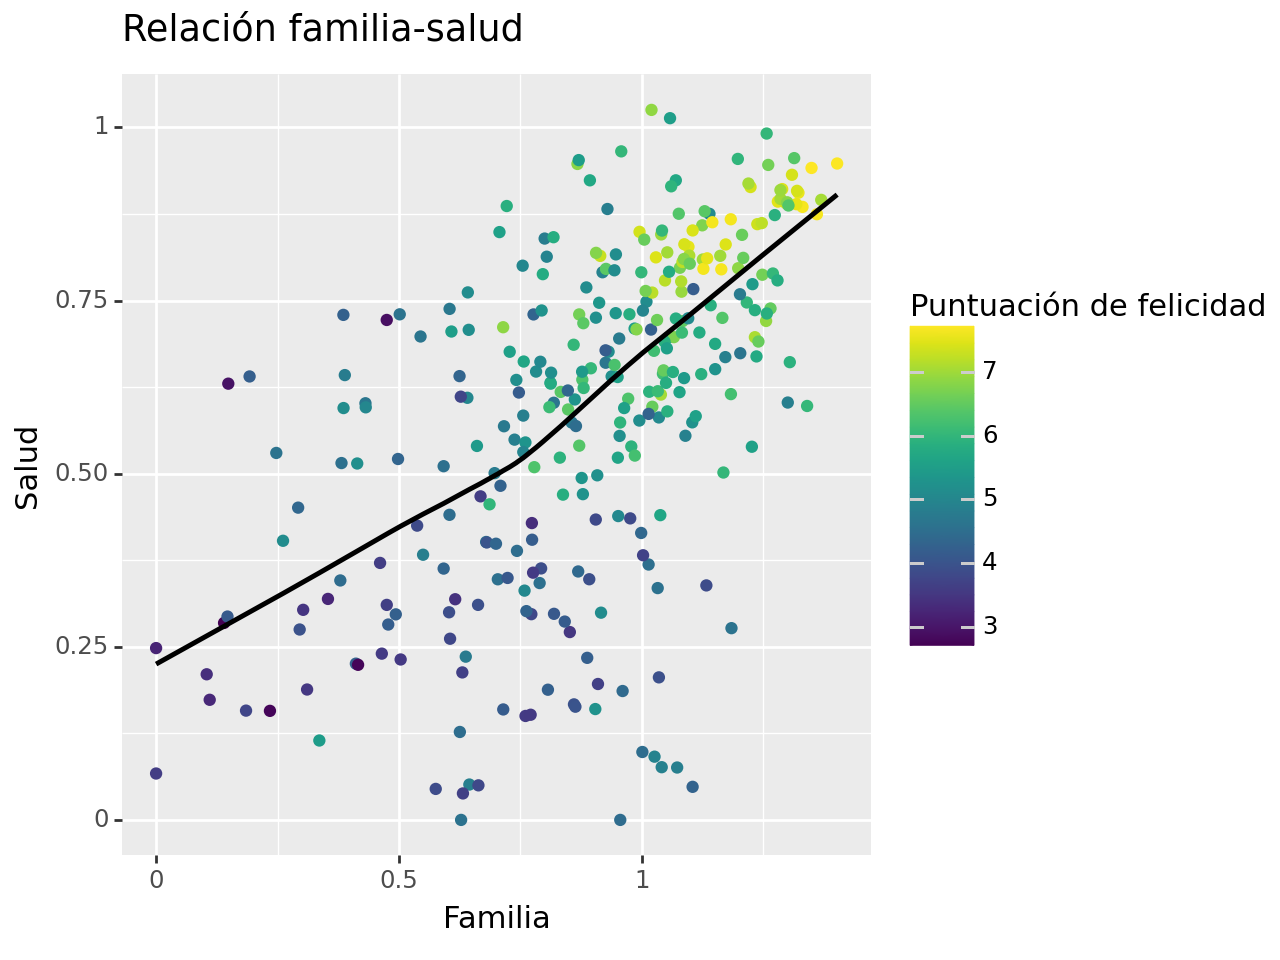

<Figure Size: (640 x 480)>

In [19]:
'''
El gráfico de dispersión (geom_point) nos permite observar posibles correlaciones entre las variables, 
motivo por el que se usó en este apartado.
Además, al modificar el color de los puntos en función de la 'Happiness Score',
podemos apreciar cómo la familia y la salud tienen gran importancia en los paises con las puntuaciones de felicidad más elevadas.

En cuanto a la relación entre familia y salud, se ha incluido una recta de ajuste (geom_smooth). 
Como podemos observar, ambas variables tienen correlación positiva. Además, la correlación es más débil en los países con puntuaciones de felicidad bajas.
Es decir, muchos de los paises que se encuentran en los primeros lugares del ranking consideran la familia y la salud como dos de los factores más importantes,
mientras que para otros paises la relación entre ambas variables no está tan clara. 
Por ejemplo, en la gráfica se observan algunos casos en lo que se le tiene gran estima a la familia pero la salud es bastante pobre y, por lo tanto, la puntuación de felicidad es baja.
'''
(
    ggplot(df) +
    geom_point(aes(x = 'Family', y = 'Health (Life Expectancy)', color = 'Happiness Score')) +
    geom_smooth(aes(x = 'Family', y = 'Health (Life Expectancy)')) +
    labs(title = 'Relación familia-salud',
        x = 'Familia',
        y = 'Salud',
        color = 'Puntuación de felicidad')
)


9. Muestra de forma gráfica la relación entre la puntuación de felicidad y la confianza (corrupción del gobierno).

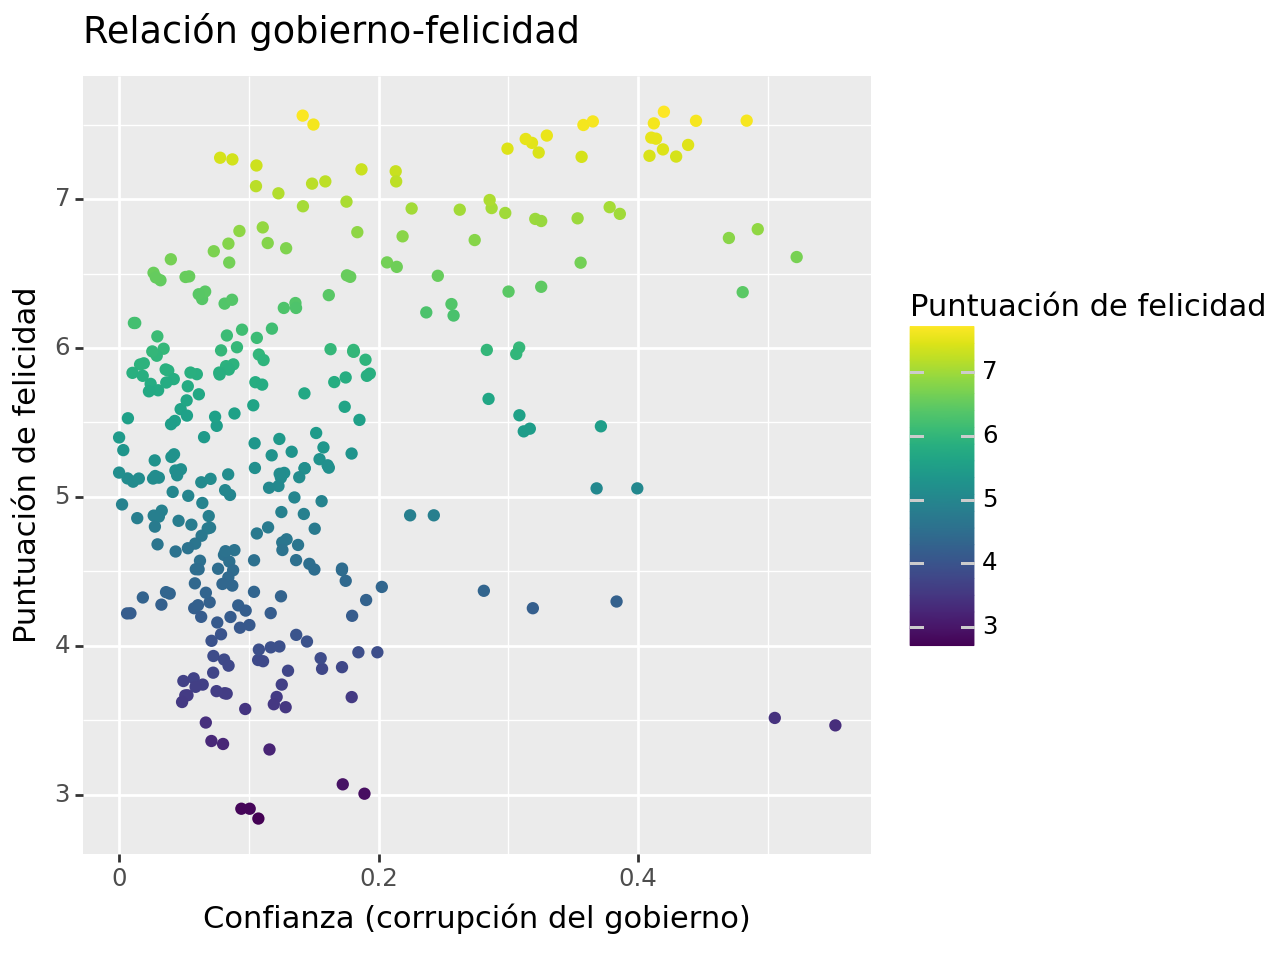

<Figure Size: (640 x 480)>

In [20]:
'''
Al igual que en el apartado anterior, usamos un gráfico de dispersión para mostrar la relación entre las variables.
En este caso, la puntuación de felicidad y la confianza en el gobierno no tienen una correlación clara. 
Si nos fijamos en la gráfica, aunque la puntuación de felicidad aumente, muchos países mantienen el mismo nivel de corrupción.
'''
(
    ggplot(df) +
    geom_point(aes(x = 'Trust (Government Corruption)', y = 'Happiness Score', color = 'Happiness Score')) +
    labs(title = 'Relación gobierno-felicidad',
        x = 'Confianza (corrupción del gobierno)',
        y = 'Puntuación de felicidad',
        color = 'Puntuación de felicidad')
)

10. Muestra la matriz de correlación del daframe.

In [21]:
df[df.columns[2:]].corr()   

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval
Happiness Rank,1.000000,-0.993905,0.057798,-0.783247,-0.686502,-0.741182,-0.545570,-0.378864,-0.152613,-0.522146,-0.637600,-0.672412
Happiness Score,-0.993905,1.000000,-0.061461,0.779171,0.693547,0.734491,0.556414,0.397989,0.168272,0.526343,0.642782,0.675427
Standard Error,0.057798,-0.061461,1.000000,-0.186844,0.266522,0.027844,0.126096,-0.039259,-0.046720,-0.151971,0.358475,-0.254805
Economy (GDP per Capita),-0.783247,0.779171,-0.186844,1.000000,0.566283,0.789103,0.331127,0.294856,-0.015402,0.079411,0.458275,0.572825
Family,-0.686502,0.693547,0.266522,0.566283,1.000000,0.569937,0.476671,0.205060,0.075987,0.053264,0.584296,0.362675
Health (Life Expectancy),-0.741182,0.734491,0.027844,0.789103,0.569937,1.000000,0.369799,0.249773,0.088002,0.025248,0.533266,0.445436
Freedom,-0.545570,0.556414,0.126096,0.331127,0.476671,0.369799,1.000000,0.492875,0.356615,0.034829,0.430341,0.313743
Trust (Government Corruption),-0.378864,0.397989,-0.039259,0.294856,0.205060,0.249773,0.492875,1.000000,0.289499,-0.023504,0.260942,0.251497
Generosity,-0.152613,0.168272,-0.046720,-0.015402,0.075987,0.088002,0.356615,0.289499,1.000000,-0.110632,0.096332,0.113839
Dystopia Residual,-0.522146,0.526343,-0.151971,0.079411,0.053264,0.025248,0.034829,-0.023504,-0.110632,1.000000,0.254306,0.417670


11. Tras unir los dataframes, los países aparecerán más de una vez. Muestra agrupado el dataframe por país con el valor máximo de felicidad, sin importar el año.

In [22]:
df.groupby(['Country'])['Happiness Score'].max()

Country
Afghanistan    3.575
Albania        4.959
Algeria        6.355
Angola         4.033
Argentina      6.650
               ...  
Venezuela      6.810
Vietnam        5.360
Yemen          4.077
Zambia         5.129
Zimbabwe       4.610
Name: Happiness Score, Length: 164, dtype: float64

12. ¿Tiene relación la felicidad con la generosidad? Muéstralo gráficamente a través de la puntuación de libertad.

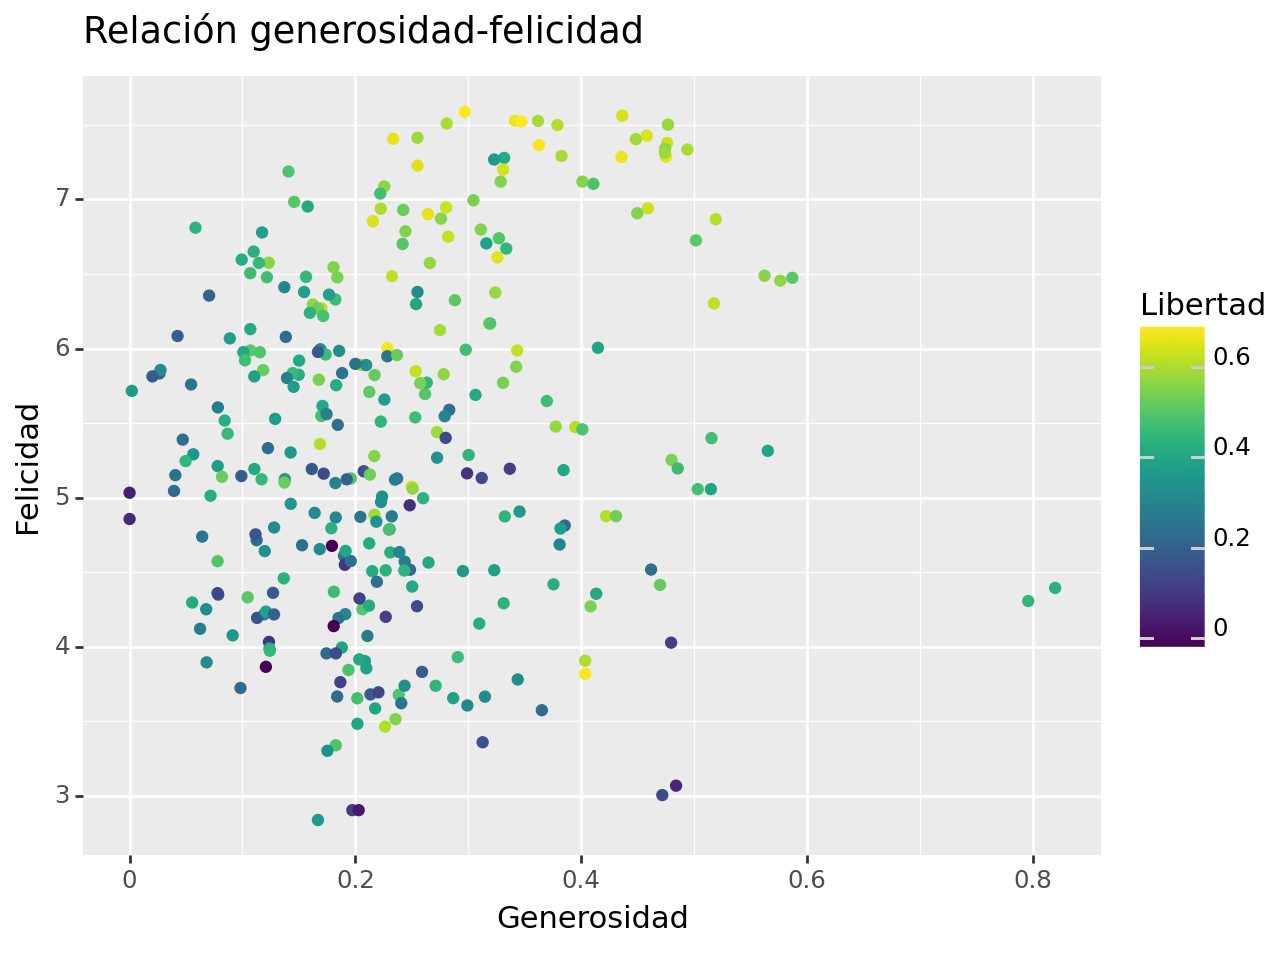

<Figure Size: (640 x 480)>

In [23]:
'''
La felicidad y la generosidad no tienen correlación. Mientras que, en el caso de la libertad y la felicidad, 
la gráfica muestra cómo cuanto más libres se sienten los ciudadanos mayor es la puntuación de felicidad.
'''
(
    ggplot(df) +
    geom_point(aes(x = 'Generosity', y = 'Happiness Score', color = 'Freedom')) +
    labs(title = 'Relación generosidad-felicidad',
        y = 'Felicidad',
        x = 'Generosidad',
        color = 'Libertad')
)

13. Muestra la distribución del grado de distopía en función de la región.

C:\ProgramData\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


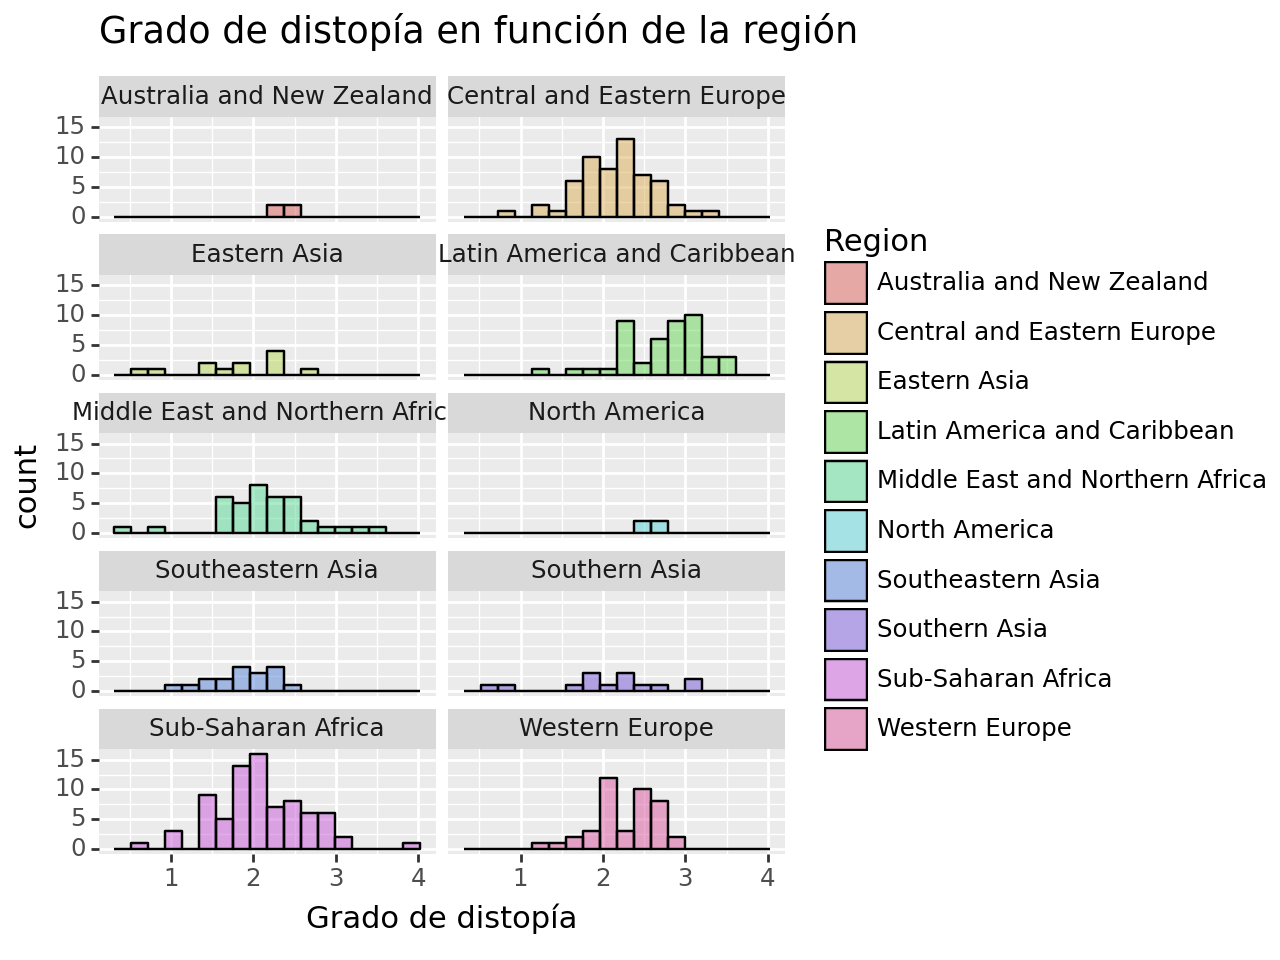

<Figure Size: (640 x 480)>

In [25]:
'''
facet_wrap() permite mostrar un gráfico por categoría, es decir, un gráfico por región.
'''
(
    ggplot(df) +
    geom_histogram(aes(x = 'Dystopia Residual', fill = 'Region'), alpha = 0.5, color = 'black') +
    labs(title = 'Grado de distopía en función de la región',
        x = 'Grado de distopía',
        color = 'Regiones')
    + facet_wrap('~Region', ncol = 2)
)